# Test taller 3

In [21]:
class GeneradoresAleatorios:
    
    def genera_Conguencial(self,cant,semilla):
       
        longitud=0
        x0=semilla
        xi=x0
        m=171
        a=13
        b=7
        v=[]
       
        while cant>0: 
            xi=float((a*xi+b)%m)
            ui=xi/m
            print xi," ",ui           
            v.append(ui)
            cant-=1
        return v

           
    def genera_midsquare(self,cant,semilla):
                
        x0=semilla
        aux=x0        
        n=0
        ui='0.'+str(x0)    
        cuadrado=str(x0*x0)
        v=[]       
        
        while aux>0:
            aux=aux/10
            n+=1
            n=n/2
       
        while len(cuadrado) < (4*n):
            cuadrado='0'+cuadrado
           
        while cant>0:
            xi=cuadrado
            xi=xi[n:len(xi)-n]
            ui='0.'+ str(xi)
            cuadrado=str(int(xi)*int(xi))
            
            while len(cuadrado)<4*n:
                cuadrado='0'+str(cuadrado)
            #print 'Ui',float(ui)
            v.append(float(ui))    
            cant-=1
        return v   

    def genera_randu(self,cant,semilla): 
       
        m=2147483648
        a=65539
        xi=semilla
        v =[]
        while cant>0: 
            xi=float((a*xi) % m)
            ui=xi/m
            #print ui
            v.append(ui)            
            cant-=1
        return v    
        
    def genera_wichmannHill(self,cant,semilla): 
        x0=semilla
        y0=7*semilla
        z0=2*semilla
        mx=30269
        my=30307
        mz=30323
        ax=171
        ay=172
        az=170
        xi=x0
        yi=y0
        zi=z0
        v=[]
        while cant>0: 
            xi=float((ax*xi) % mx)
            yi=float((ay*yi) % my)
            zi=float((az*zi) % mz)
            ui=((xi/mx)+(yi/my)+(zi/mz)) % 1
            #print ui
            v.append(ui)            
            cant-=1
        if len(v)==1:     
            return v[0]
        else:
            return v

g=GeneradoresAleatorios() 
#g.genera_Conguencial(10,5)
#g.genera_midsquare(10,5)
#g.genera_randu(10,5)
g.genera_wichmannHill(10,5)


[0.2829437544636361,
 0.5259529377834209,
 0.572277484140993,
 0.02480948640879399,
 0.12883732683118154,
 0.06758624236755173,
 0.2281814752252926,
 0.04439280572034976,
 0.15342707495225127,
 0.9857715219854344]

Numero iteraciones: 72
Valor Medio: 47.6666666667
Valor Desviacion: 12.4777777778


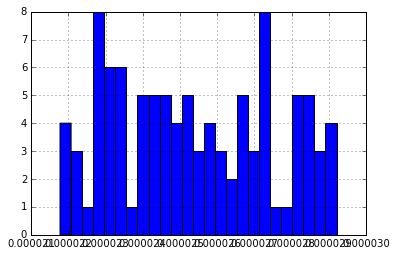

In [22]:
%matplotlib inline 
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
g=GeneradoresAleatorios()

class Contrastes:
    
    def chiCuadrado(self):     
        n=10000 #Longitud de la secuencia
        xau=g.genera_wichmannHill(n,137)#Se define la secuencia de mi generador de 100 muestas
        k=25. # cantidad de subintervalos
        ei=n/k #Cantidad esperada de observaciones
        chicuad=0.#Almacena la suma acumulada del test
        i=1.
        fo=[]#vector con las frecuencias observadas
        
        while i<=k:
            fi=self.contarMuestras(xau,(i-1)/k,i/k) # Deterina las obsevaciones en una clase 
            fo.append(fi)
            chicuad+=np.square(fi-ei)/ei # Variable que calcula el test
            i+=1
        
        chiprobe,pvalue= st.chisquare(fo,ei)        
        plt.hist(xau,k)
        plt.plot(xau,ei*np.ones_like(xau),lw=2.0,color='r',label="No aparese :(")
            
        print 'Valor Esperado:', chicuad    
        print 'Valor Obtenido:',chiprobe
        print 'Valor Error:',pvalue
                
    def contarMuestras(self,a,vmin,vmax):
        cant=0
        for x in a:
             
            if vmin < x < vmax: # si la observación esta dentro de la clase se cueta una nueva observación
                cant+=1
       
        return cant
        
    def rachas(self):
        
        n=100 #Longitud de la secuencia
        x=g.genera_wichmannHill(n,30)  #Secuencia de numeros aleatorios      
        media,desv,test=0,0,0 #parametros para el calculo del test
        r,n,i=[],0,0       #Parametros para el calculo de las rachas
        while i< (len(x)-1):           
            if x[i+1] >= x[i]:
                r.append(1)
            #   des+=1
            else:               
                r.append(0)               
            #   asc+=1
            i+=1
        i=0 #variable para las iteraciones del vector con las rachas  
        l=0 # Variable Auxiliar para el conteo de rachas
        #[000100011]               
        while i< len(r):#Determina el numero de cambios     que hay en el vector binario (unos y ceros) de rachas
            if i==0:
                l=r[i]
            else:
                if r[i]!=l:
                    n+=1
                if (i==(len(r)-1)):
                    n+=1
            l=r[i]
                
            i+=1
            
        media,desv=(2*n-1)/3.,(16*n-29)/90. #Parametros para la distribución gausiana
                
        test=st.norm.pdf(x,media,desv) # Se calcula el test con la distribución normalizada
        plt.hist(test,25)
        #plt.plot(np.sort(x),x,'o-')
        plt.grid(True)
        
        print 'Numero iteraciones:',n
        print 'Valor Medio:',media
        print 'Valor Desviacion:',desv
        
    def rachasMediana(self) :
        
        n=100 #Longitud de la secuencia
        x=g.genera_wichmannHill(n,30) #  Se genera la secuencia de numeros aleatorios 
        mediana=np.median(np.sort(x)) #Se calcula la mediana de la secuencia de numeros aleatorios        
        media,desv,test=0,0,0 #Variables para el test
        r,n,i=[],0,0       #Variables para calcular las rachas
        while i< (len(x)-1):# Llena el vector binario(unos y ceros) si el numero esta por encima o debajo de la mediana           
            if x[i]>mediana:
                r.append(1)
            #   des+=1
            else:               
                r.append(0)               
            #   asc+=1
            i+=1
        i=0  
        l=0 
                       
        while i< len(r):#Determina el numero de cambios     que hay en el vector binario (unos y ceros) de rachas
            if i==0:
                l=r[i]
            else:
                if r[i]!=l:
                    n+=1
                if (i==(len(r)-1)):
                    n+=1
            l=r[i]                
            i+=1
            
        media,desv=(2+n)/2.,n/2. #Parametros para la distribución gausiana
        test=st.norm(media,desv)
        
        print test
        
    def permutaciones(self):
        x=g.genera_wichmannHill(100,23) # Se genera la secuencia de numeros aleatorios 
        kuplas,upla,k=[],[],0 # Vectores para las Uplas y el numero de
        
        
        
                
    def huecos(self):

        x=g.genera_wichmannHill(100,23) # Se genera la secuencia de numeros aleatorios 
        # Se generan dos valores fijos alpha y beta con 0< alpha < beta < 1
        alpha=g.genera_wichmannHill(1,31) # Se genera el limite alpha
        beta= g.genera_wichmannHill(1,29) # Se genera el limite beta
        m=0 #Variable para la logitud del hueco
        x=np.sort(x)
        
    def smirnov(self):
        N = 100
        # Teoretical CDF for Uniform distribution F(x)
        u = [1.0] * N
        #print(u)

        # Gerate random numbers with Uniform distribution f(x)
        #np.random.seed(123456789)
        
        #x = np.random.uniform(0,1,N)
        x=g.genera_wichmannHill(100,23)

        # Plot empirical distribution f(x)
        count, bins, ignored = plt.hist(x, 25, normed=True)
        plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
        plt.show()
        
               
        x1 = np.arange(1/float(N),1+1/float(N),1/float(N))
        y1 = np.cumsum(np.sort(u)/np.max(np.cumsum(u)))

        x2 = np.sort(x)
        y2 = np.cumsum(np.sort(x)/np.max(np.cumsum(x)))

        De=np.absolute(y2-y1)
        #print(D)
        
        print("De = ",np.max(De))

        # Plotting
        plt.plot(x1,y1,label='Uniform')
        plt.step(x2,y2,label='Random')
        x3 = [x1[De.argmax()],x1[De.argmax()]]
        y3 = [np.min([y1[De.argmax()],y2[De.argmax()]]),np.max([y1[De.argmax()],y2[De.argmax()]])]
        plt.step(x3,y3,label='D')

        #plt.plot(x1,De,label='De')

        plt.legend()
        plt.xlabel('X')
        plt.ylabel('Cumulative Probability P(X)')
        #plt.title('arbitrary')
        #plt.xscale('log')
        #plt.yscale('log')

        #plt.xlim(0, np.max([np.max(whitney),np.max(redwell)])+0.05)
        plt.ylim(0, 1.05)

        plt.show()

        # scipy function for K-S test
        from scipy import stats
        D,pvalue = stats.kstest(y2, 'uniform')
        print("D = ", D)
        print("p-value = ", pvalue)
        
        
                
        
a=Contrastes()
#a.chiCuadrado()
a.rachas()
#a.rachasMediana()
#a.permutaciones()
#a.huecos()
#a.smirnov()